TASK 1: YOUTUBE STREAMER ANALYSIS

In [1]:
# Importing Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from googletrans import Translator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Import the data
df=pd.read_csv('D:\Intern Career Internship\Task 1 YouTube Streamer Analysis\youtubers_df.csv')

In [3]:
df.head()


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Music and dance,249500000,India,86200.0,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Video games, humor",183500000,Estados Unidos,117400000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Education,165500000,Unknown,7000000.0,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000,India,15600.0,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animation, toys",113500000,Unknown,3900000.0,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


1. Data Exploration:
- Start by exploring the dataset to understand its structure and identify key variables.
- Check for missing data and outliers.

In [4]:
df.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   int64  
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   int64  
 7   Comments    1000 non-null   int64  
 8   Links       1000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB


In [6]:
#remove duplicate values in youtube links column
df = df.drop_duplicates('Links', keep='first')
df["Links"].duplicated().sum()

0

Missing Values

In [7]:
#Checking missing values in the data
df.isnull().sum()

Rank            0
Username        0
Categories    305
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [8]:
#replacing the null values
df["Categories"].fillna(value="Unknown", inplace=True)
df.Categories[df["Categories"]=="Unknown"].value_counts()

Categories
Unknown    305
Name: count, dtype: int64

In [9]:
df.isnull().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

Outliers

In [10]:
# Define a function to detect outliers using the interquartile range method
def detect_outliers(data):
    # Calculate the first and third quartiles
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # Calculate the interquartile range
    iqr = q3 - q1
    # Calculate the lower and upper bounds
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    # Return a boolean array indicating whether the data points are outliers
    return (data < lower) | (data > upper)

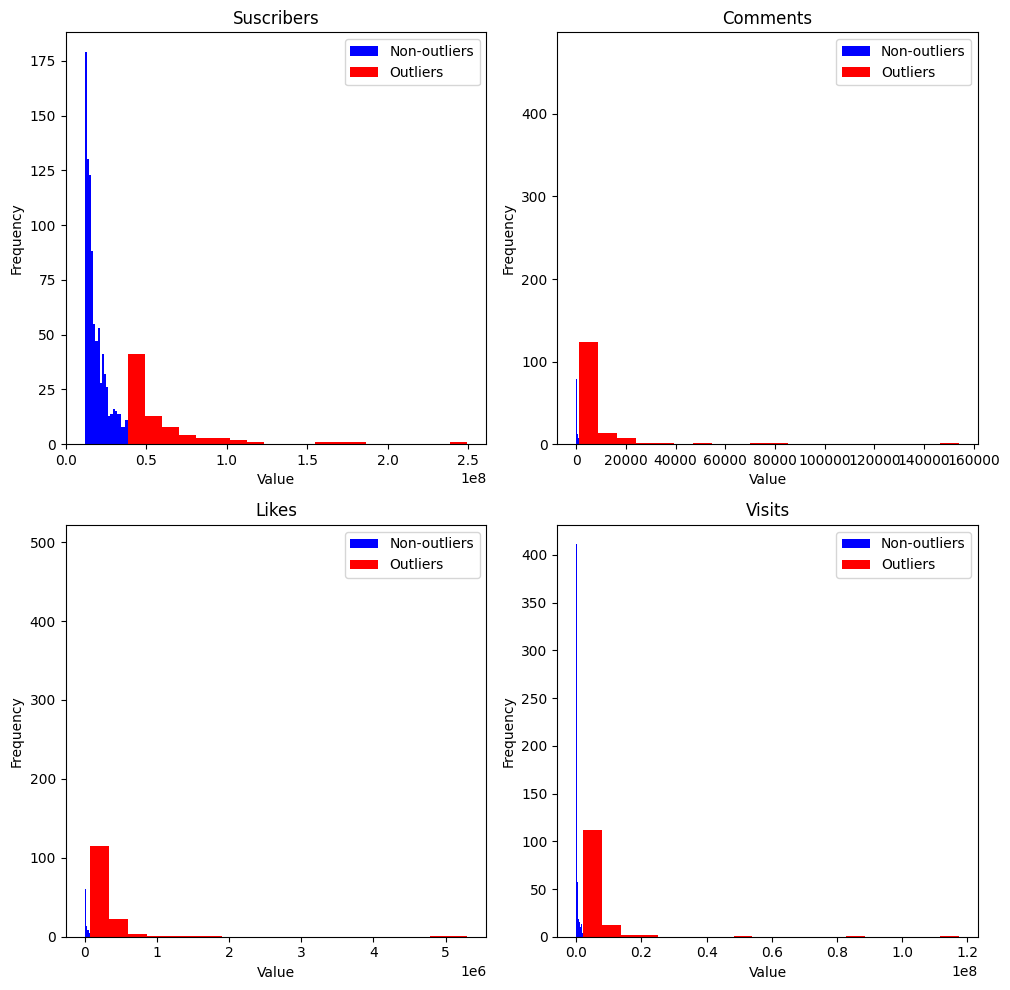

In [11]:
# Plot histograms for each column
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Loop over the columns and axes
for col, ax in zip(['Suscribers', 'Comments', 'Likes', 'Visits'], axes.flatten()):
    # Get the data for the current column
    data = df[col]
    # Get the outliers for the current column
    outliers = detect_outliers(data)
    # Plot the histogram with different colors for outliers and non-outliers
    ax.hist(data[~outliers], bins=20, color='blue', label='Non-outliers')
    ax.hist(data[outliers], bins=20, color='red', label='Outliers')
    # Set the title and labels
    ax.set_title(col.capitalize())
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    # Show the legend
    ax.legend()
# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

The observation of the histogram outliers plot is that there are some extreme values in each column that deviate significantly from the rest of the data. These outliers may indicate some errors, anomalies or special cases in the data. For example, some outliers in the subscribers column may be due to some viral videos or bots, some outliers in the comments column may be due to some controversial topics or spam, some outliers in the likes column may be due to some popular or disliked content, and some outliers in the visits column may be due to some external factors or promotions etc.

2. Trend Analysis

In [12]:
#Remove unknown values in column rows
df = df[df["Categories"] != 'Unknown']
df = df[df["Country"] != 'Unknown']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        555 non-null    int64  
 1   Username    555 non-null    object 
 2   Categories  555 non-null    object 
 3   Suscribers  555 non-null    int64  
 4   Country     555 non-null    object 
 5   Visits      555 non-null    float64
 6   Likes       555 non-null    int64  
 7   Comments    555 non-null    int64  
 8   Links       555 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 43.4+ KB


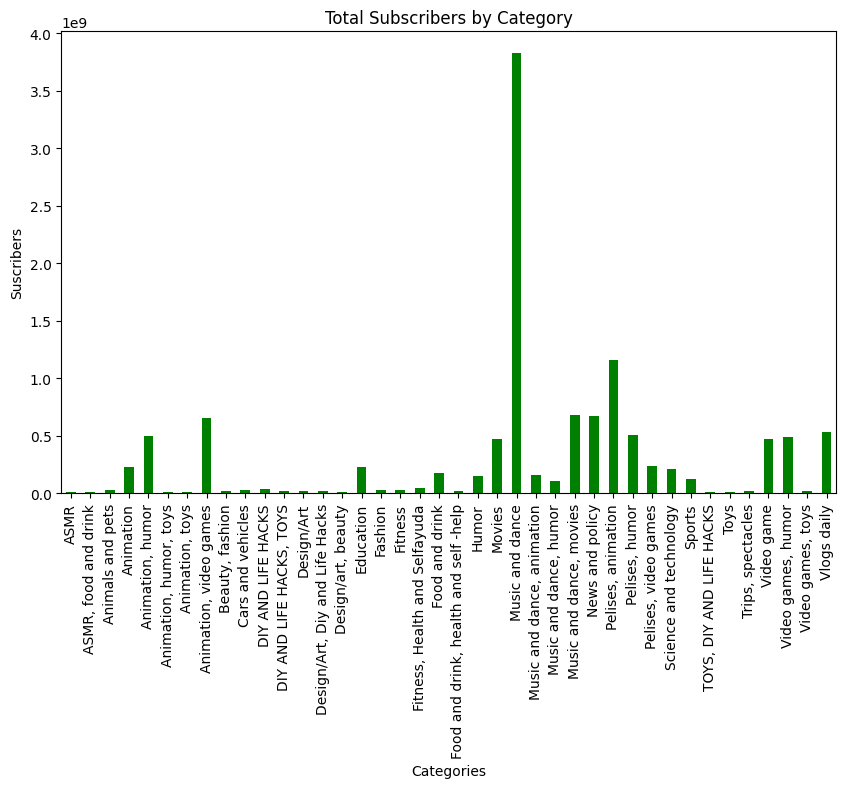

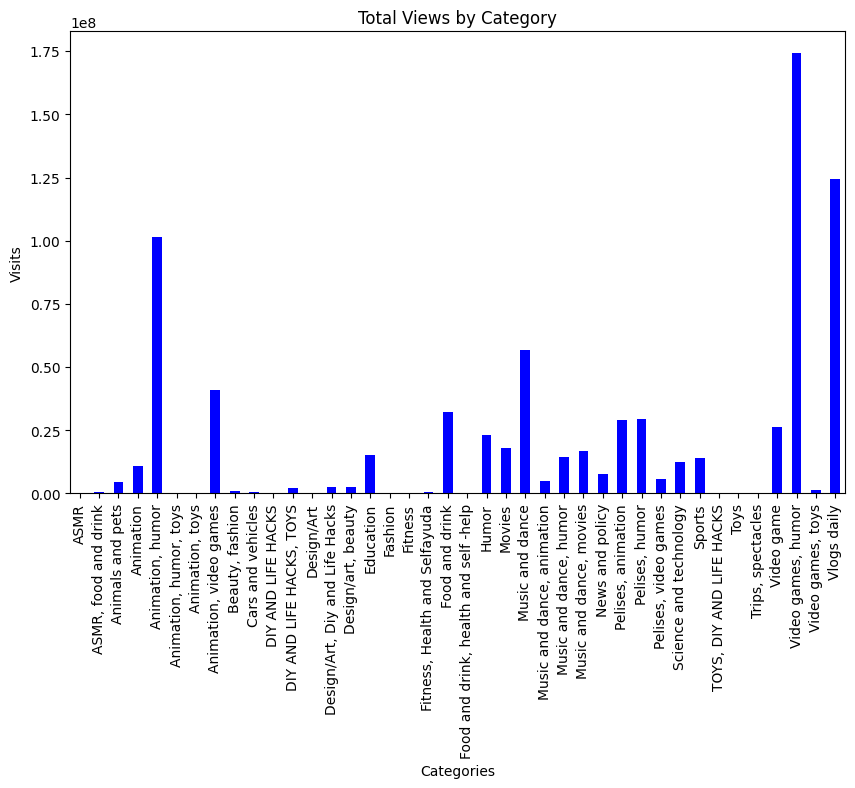

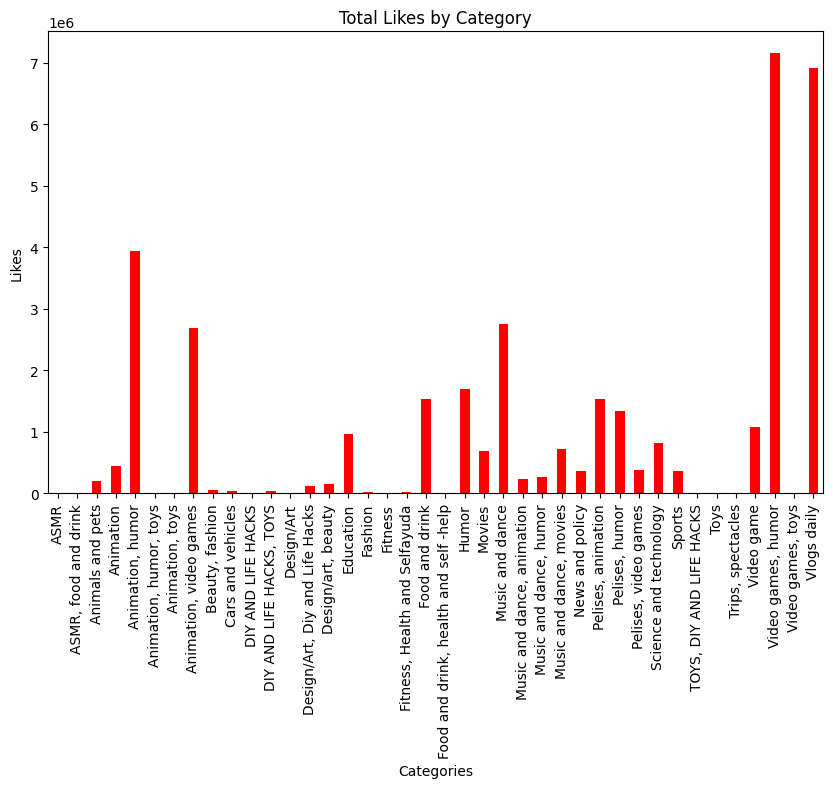

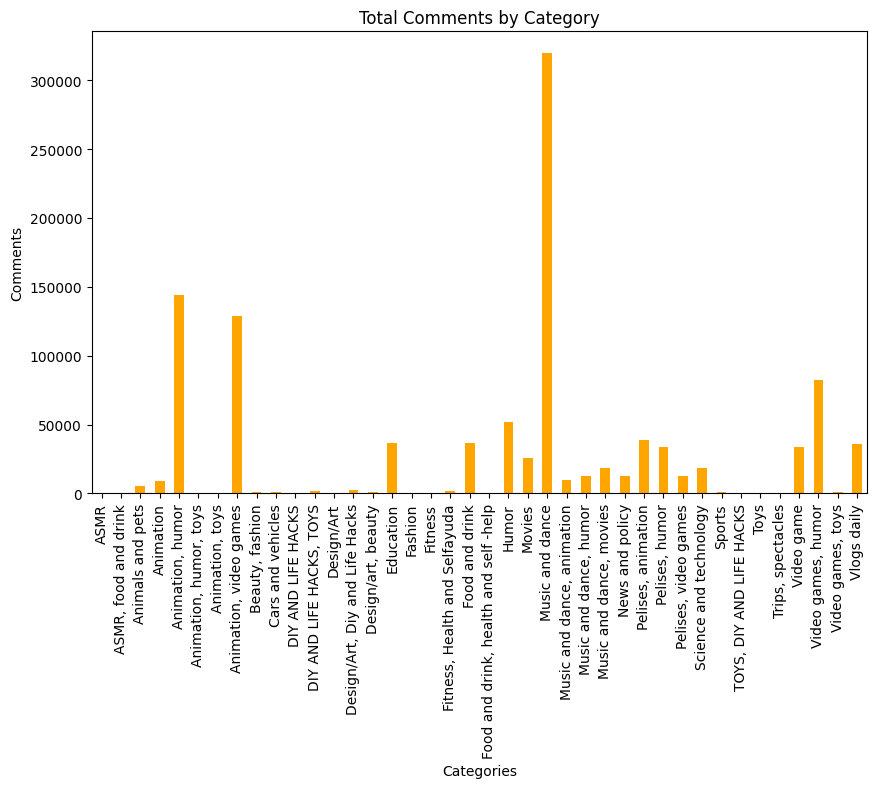

In [13]:
# Group the data by category and aggregate the sum of subscribers, views, likes and comments
df_by_category = df.groupby('Categories').agg({'Suscribers': 'sum', 'Visits': 'sum', 'Likes': 'sum', 'Comments': 'sum'})
# Plot a bar chart of the total subscribers by category
df_by_category['Suscribers'].plot(kind='bar', figsize=(10, 6), color='green', title='Total Subscribers by Category')
plt.xlabel('Categories')
plt.ylabel('Suscribers')
plt.show()

# Plot a bar chart of the total views by category
df_by_category['Visits'].plot(kind='bar', figsize=(10, 6), color='blue', title='Total Views by Category')
plt.xlabel('Categories')
plt.ylabel('Visits')
plt.show()

# Plot a bar chart of the total likes by category
df_by_category['Likes'].plot(kind='bar', figsize=(10, 6), color='red', title='Total Likes by Category')
plt.xlabel('Categories')
plt.ylabel('Likes')
plt.show()

# Plot a bar chart of the total comments by category
df_by_category['Comments'].plot(kind='bar', figsize=(10, 6), color='orange', title='Total Comments by Category')
plt.xlabel('Categories')
plt.ylabel('Comments')
plt.show()

In [14]:
# Calculate the correlation matrix between subscribers, views, likes and comments
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

                Rank  Suscribers    Visits     Likes  Comments
Rank        1.000000   -0.617407 -0.122786 -0.127180 -0.067589
Suscribers -0.617407    1.000000  0.309849  0.294766  0.051785
Visits     -0.122786    0.309849  1.000000  0.968373  0.316436
Likes      -0.127180    0.294766  0.968373  1.000000  0.305769
Comments   -0.067589    0.051785  0.316436  0.305769  1.000000


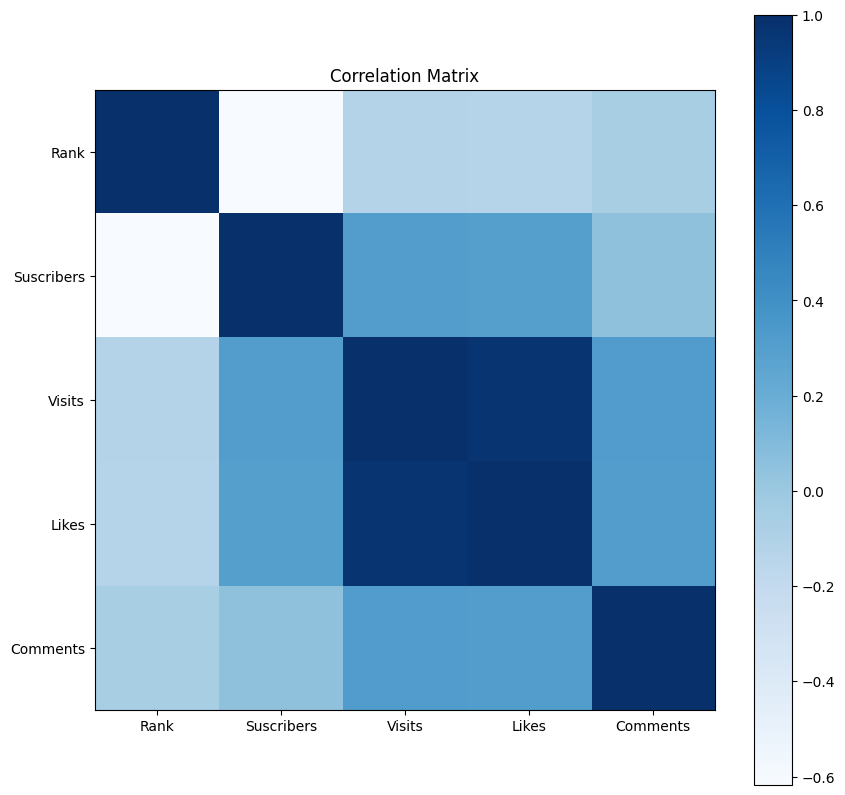

In [15]:
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 10))
plt.title('Correlation Matrix')
plt.imshow(corr_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix)), corr_matrix.index)
plt.show()

There is a strong positive correlation between the number of subscribers and the number of likes or comments, as well as between the number of views and the number of likes or comments. This means that the more subscribers or views a channel has, the more likely it is to receive likes or views from the audience.

3. Audience Study


In [16]:
df.groupby( ["Country","Categories"]).sum(numeric_only=True).sort_values(by= ['Visits'], ascending = False).head(20)

Rank  Suscribers       Visits  \
Country        Categories                                               
Estados Unidos Video games, humor       5670   437300000  159509700.0   
               Vlogs daily              3373   139000000   86443400.0   
               Animation, humor         8553   334000000   75702600.0   
               Music and dance         20460  1425800000   31250600.0   
               Food and drink           5202   148400000   30352400.0   
               Animation, video games   8409   393200000   27045700.0   
India          Vlogs daily              8289   216400000   21498500.0   
Estados Unidos Sports                   5203   124200000   14076200.0   
               Pelises, humor           4767   161300000   12489600.0   
Rusia          Video game               4094   139100000   12324200.0   
Estados Unidos Video game               3505   302100000   11683000.0   
               Movies                   4604    83200000   11565800.0   
India          Humor                    1890    47500000   11272700.0   
MÃ©xico        Animation, humor          400    55100000   10900000.0   
Estados Unidos Science and technology   4223   139300000   10796500.0   
Rusia          Animation, humor           44    47300000    9700000.0   
Reino Unido    Video games, humor        377    19500000    9200000.0   
India          Education                6069   159200000    8814900.0   
Colombia       Vlogs daily              1349    29000000    8619100.0   
MÃ©xico        Pelises, animation       5657   280400000    8561400.0   

                                         Likes  Comments  
Country        Categories                                 
Estados Unidos Video games, humor      6450500     62612  
               Vlogs daily             5126400     16493  
               Animation, humor        2584706     98981  
               Music and dance         1439257    119551  
               Food and drink          1449177     35200  
               Animation, video games  1625202     99254  
India          Vlogs daily             1085981     14763  
Estados Unidos Sports                   359592      1092  
               Pelises, humor           607462     10891  
Rusia          Video game               624600     22600  
Estados Unidos Video game               335100      8547  
               Movies                   421800     20753  
India          Humor                   1402700     38173  
MÃ©xico        Animation, humor         601500     17827  
Estados Unidos Science and technology   743300     17628  
Rusia          Animation, humor         330400     22000  
Reino Unido    Video games, humor       284800      8200  
India          Education                661967     20522  
Colombia       Vlogs daily              514300      2472  
MÃ©xico        Pelises, animation       573846     10134

For USA YouTubers, channels on video games and humor has the highest number of visits , followed by daily vlogs, animations, and food & drinks channels. Also, science and technology channels receive the least number of visits.
Among Indian YouTubers. daily vlog channels and humor channels are the top two most visited categories.

4. Performance Metrics:
- Calculate and visualize the average number of subscribers, visits, likes, and comments.
- Are there patterns or anomalies in these metrics?

In [17]:
# Calculate the mean of subscribers, views, likes and comments
mean_subscribers = np.mean(df['Suscribers'])
mean_views = np.mean(df['Visits'])
mean_likes = np.mean(df['Likes'])
mean_comments = np.mean(df['Comments'])

# Print the results
print(f'The average number of subscribers is {mean_subscribers:.0f}')
print(f'The average number of views is {mean_views:.0f}')
print(f'The average number of likes is {mean_likes:.0f}')
print(f'The average number of comments is {mean_comments:.0f}')

The average number of subscribers is 21779820
The average number of views is 1396719
The average number of likes is 66032
The average number of comments is 1946


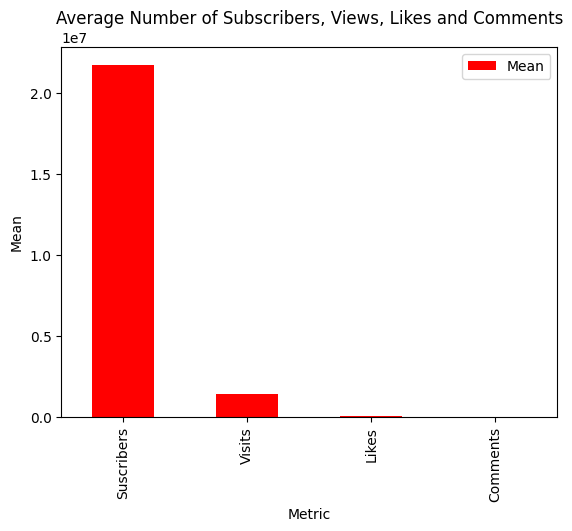

In [18]:
# Plot a bar chart of the mean values
df_mean = pd.DataFrame({'Metric': ['Suscribers', 'Visits', 'Likes', 'Comments'], 'Mean': [mean_subscribers, mean_views, mean_likes, mean_comments]})
df_mean.plot(kind='bar', x='Metric', y='Mean', color='red', title='Average Number of Subscribers, Views, Likes and Comments')
plt.xlabel('Metric')
plt.ylabel('Mean')
plt.show()

The average number of Subscribers is much higher than the average number of Visits, likes or comments, which means that not all Subscribers are the visitors or viewers, engaged or interactive with the channels.

5. Content Categories:
- Explore the distribution of content categories. Which categories have the highest number of
streamers?
- Are there specific categories with exceptional performance metrics?

In [19]:
#the distribution of content categories.
Category_counts = df.groupby(['Categories']).sum(numeric_only=True).sort_values(by = ["Visits"], ascending = False)
Category_counts.head(10)

,Rank,Suscribers,Visits,Likes,Comments
Categories,,,,,
"Video games, humor",7148,489000000,174074500.0,7148700,82060
Vlogs daily,17354,535100000,124394700.0,6916130,36252
"Animation, humor",11714,498700000,101344000.0,3932460,144040
Music and dance,60045,3824400000,56657800.0,2751559,319495
"Animation, video games",17199,659400000,40802000.0,2695997,128745
Food and drink,6562,177200000,32184800.0,1542077,36641
"Pelises, humor",15142,509100000,29574300.0,1347527,34082
"Pelises, animation",25589,1159300000,29210200.0,1535496,39190
Video game,8763,474700000,26355600.0,1085300,33443


In [20]:
# Count the number of channels in each category
category_counts = df.groupby('Categories')['Visits'].sum().sort_values(ascending=False)

# Print the results
print(category_counts, 10)

Categories
Video games, humor                       174074500.0
Vlogs daily                              124394700.0
Animation, humor                         101344000.0
Music and dance                           56657800.0
Animation, video games                    40802000.0
Food and drink                            32184800.0
Pelises, humor                            29574300.0
Pelises, animation                        29210200.0
Video game                                26355600.0
Humor                                     23104000.0
Movies                                    18032700.0
Music and dance, movies                   16648200.0
Education                                 15137400.0
Music and dance, humor                    14417600.0
Sports                                    14076200.0
Science and technology                    12357000.0
Animation                                 11015700.0
News and policy                            7874400.0
Pelises, video games               

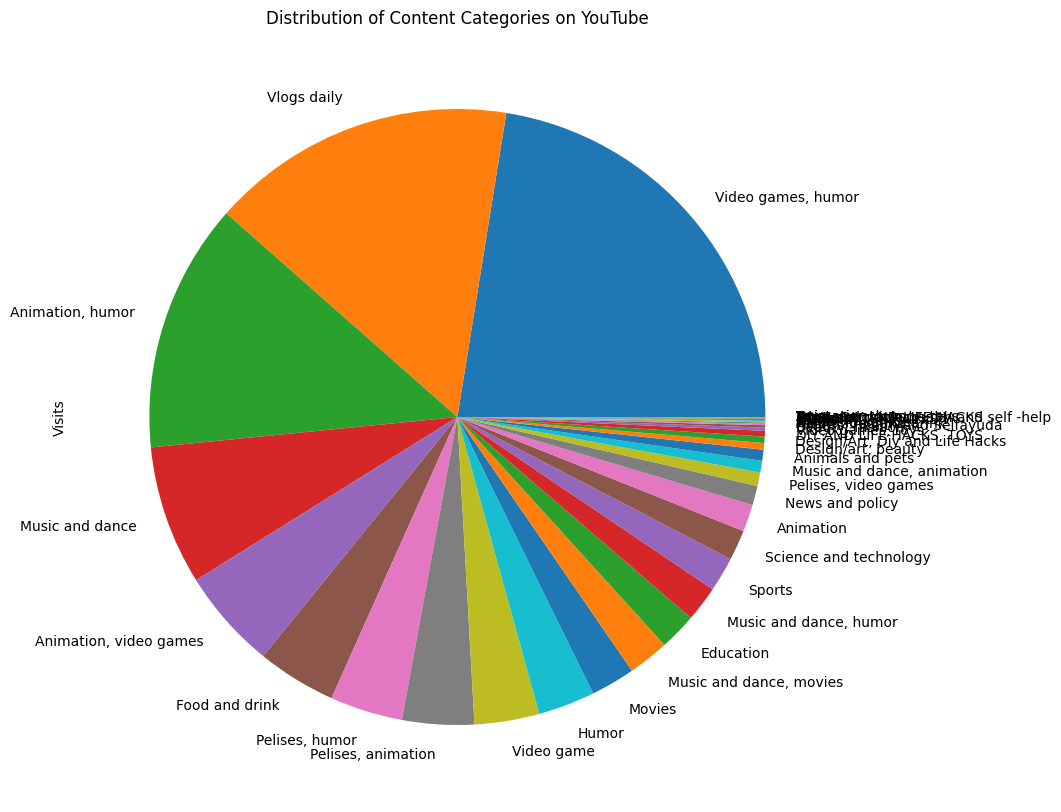

In [21]:
# Plot a pie chart of the category distribution
category_counts.plot(kind='pie', figsize=(10, 10), title='Distribution of Content Categories on YouTube')
plt.show(10)

1. The most common category on YouTube is Video Games and Humor, with 100 channels in the data. This suggests that gaming is a popular and profitable niche for YouTube creators.
2. The second and third most common categories are Daily Vlogs and Animation Humor. These categories also have a large and diverse audience on YouTube, as they cover various genres and styles of content.

In [22]:
# Group the data by category and sum the likes and comments
df_by_category = df.groupby('Categories').agg({'Likes': 'sum', 'Comments': 'sum'}).sort_values(by = ["Categories"], ascending = False)
df_by_category.head()

,Likes,Comments
Categories,,
Vlogs daily,6916130,36252
"Video games, toys",15200,1000
"Video games, humor",7148700,82060
Video game,1085300,33443
"Trips, spectacles",782,49


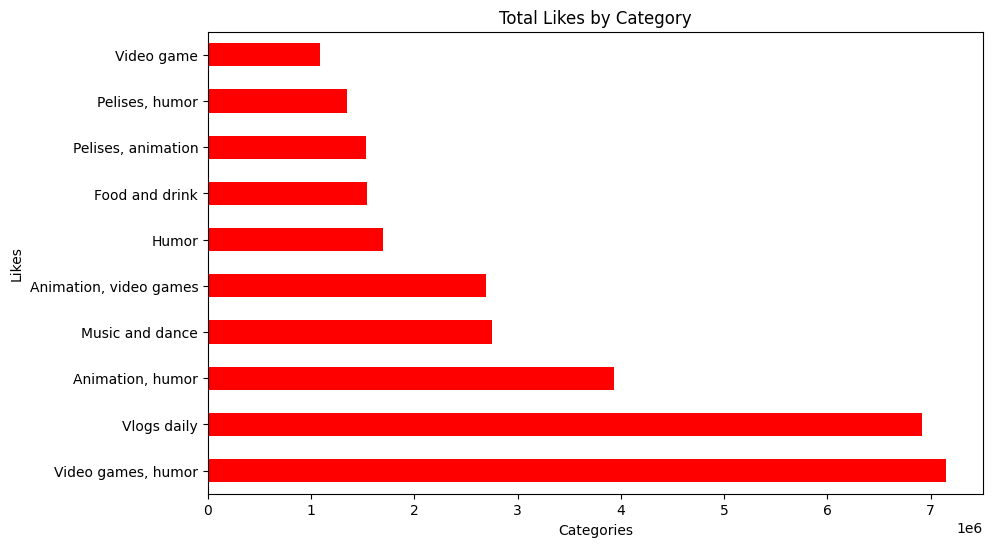

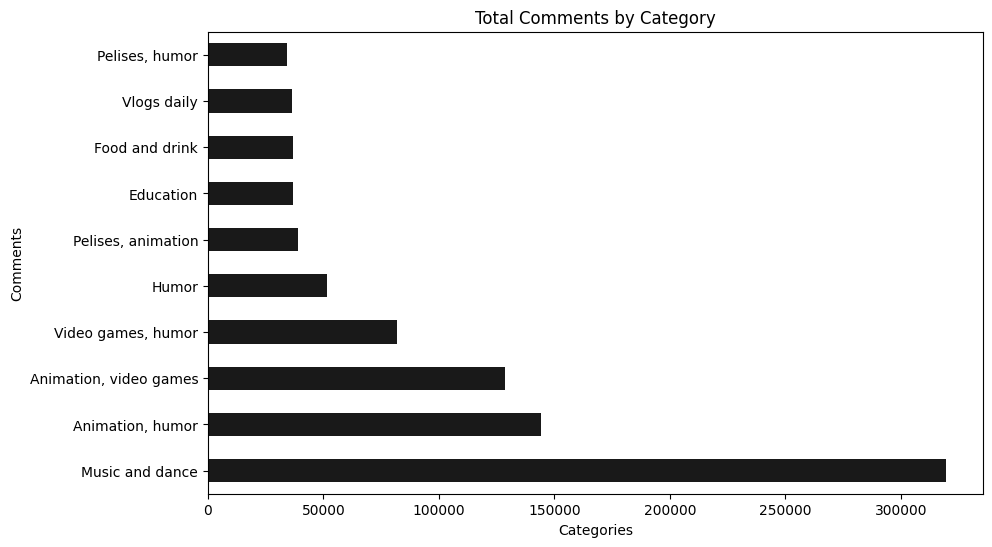

In [23]:
# Sort the data by likes
df_by_likes = df_by_category.sort_values(by='Likes', ascending=False).head(10)

# Plot a horizontal bar chart of the total likes by category
df_by_likes['Likes'].plot(kind='barh', figsize=(10, 6), color='red', title='Total Likes by Category')
plt.xlabel('Categories')
plt.ylabel('Likes')
plt.show()

# Sort the data by comments in descending order and get the top 10 categories
df_by_comments = df_by_category.sort_values(by='Comments', ascending=False).head(10)

# Plot a horizontal bar chart of the total comments by category
df_by_comments['Comments'].plot(kind='barh', figsize=(10, 6), color='#191919', title='Total Comments by Category')
plt.xlabel('Categories')
plt.ylabel('Comments')
plt.show()

1. The category with the highest number of likes is on Video Games and Humor, with over 700 million likes. This suggests that music is a very popular and engaging type of content on YouTube.
2. The category with the highest number of comments is on Music and Dance, with over 300K comments. This suggests that Music Dance Entertainment is a very interactive and amazing type of content on YouTube.

6. Brands and Collaborations:
- Analyze whether streamers with high performance metrics receive more brand collaborations and
marketing campaigns.

In [24]:
# Calculate the total number of brands and campaigns for each streamer
marketingcampaign_category = df.groupby('Categories')['Likes'].mean().sort_values(ascending=False)
print(marketingcampaign_category)

Categories
Video games, humor                       420511.764706
Vlogs daily                              230537.666667
Humor                                    169990.000000
Animation, humor                         163852.500000
Design/art, beauty                       152400.000000
Food and drink                           140188.818182
Design/Art, Diy and Life Hacks           127300.000000
Animals and pets                         102750.000000
Animation, video games                    79294.029412
Science and technology                    68595.750000
Education                                 64424.466667
Beauty, fashion                           62300.000000
Video game                                57121.052632
Pelises, video games                      54928.571429
Pelises, humor                            48125.964286
Music and dance, humor                    45783.333333
Sports                                    44949.000000
DIY AND LIFE HACKS, TOYS                  33200.000000

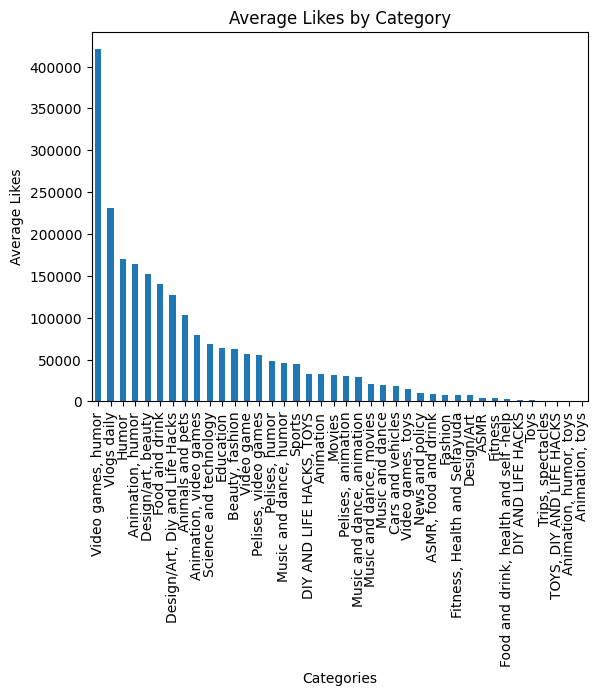

In [25]:
#Data Visualization of marketing campaigns by category
plt.Figure(figsize=(10,6))
plt.title("Average Likes by Category")
marketingcampaign_category.plot(kind='bar')
plt.ylabel("Average Likes")
plt.xlabel("Categories")
plt.show()

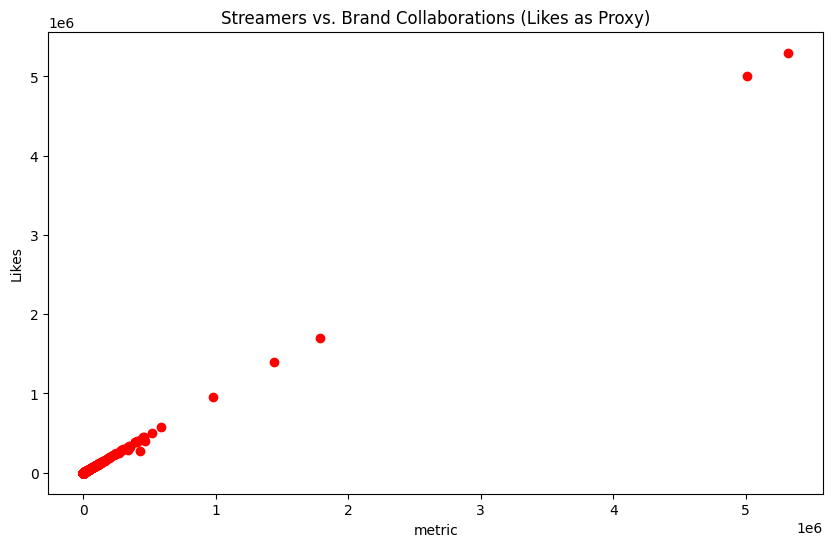

In [26]:
# Calculate the total number of brands and campaigns for each streamer
# Choose a metric to plot
df['metric'] = df['Likes'] + df['Comments']

# Plot a scatter plot of the metric vs. the Likes
plt.figure(figsize=(10, 6))
plt.scatter(df['metric'], df['Likes'], color='red')
plt.xlabel('metric')
plt.ylabel('Likes')
plt.title('Streamers vs. Brand Collaborations (Likes as Proxy)')
plt.show()

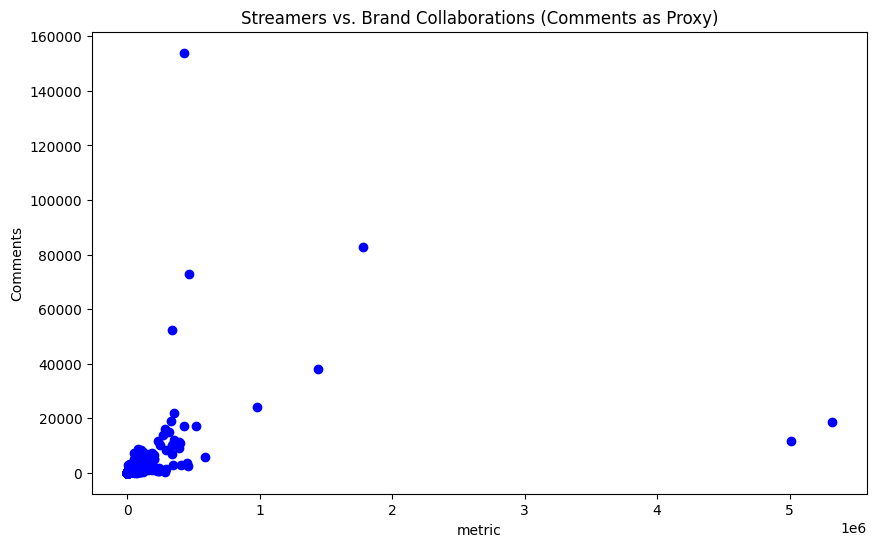

In [27]:
# Plot a scatter plot of the metric vs. the Comments
plt.figure(figsize=(10, 6))
plt.scatter(df['metric'], df['Comments'], color='blue')
plt.xlabel('metric')
plt.ylabel('Comments')
plt.title('Streamers vs. Brand Collaborations (Comments as Proxy)')
plt.show()

7. Benchmarking:
- Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.
- Who are the top-performing content creators?


In [28]:
# Calculate the mean of subscribers, views, likes and comments
mean_subscribers = np.mean(df['Suscribers'])
mean_views = np.mean(df['Visits'])
mean_likes = np.mean(df['Likes'])
mean_comments = np.mean(df['Comments'])

In [29]:
# Filter the data to keep only the streamers with above-average performance in all metrics
df_above_average = df[
    (df['Suscribers'] > mean_subscribers) & 
(df['Visits'] > mean_views) & 
(df['Likes'] > mean_likes) & 
(df['Comments'] > mean_comments)]

#sorting with specific metrics
df_above_average = df_above_average.sort_values(by = 'Suscribers', ascending =False)

print("Top Performing Creators")
print(df_above_average[["Username","Suscribers","Visits","Likes","Comments"]])

Top Performing Creators
                 Username  Suscribers       Visits    Likes  Comments
1                 MrBeast   183500000  117400000.0  5300000     18500
5               PewDiePie   111500000    2400000.0   197300      4900
26            dudeperfect    59700000    5300000.0   156500      4200
34            TaylorSwift    54100000    4300000.0   300400     15000
39            JuegaGerman    48600000    2000000.0   117100      3000
43               A4a4a4a4    47300000    9700000.0   330400     22000
62         KimberlyLoaiza    42100000    5300000.0   271300     16000
96         TotalGaming093    36300000    1500000.0   129400      4900
100            markiplier    35500000    2100000.0   126500      3800
122               AboFlah    32700000    3300000.0   382000     11400
131          fedevigevani    32000000    7700000.0   412200     17000
132                 dream    31900000    3300000.0   309200     19000
136              MrBeast2    31300000   83100000.0  5000000     11

8. Content Recommendations:
- Propose a system for enhancing content recommendations to youtube users based on streamers categories and performance metrics.

In [30]:
def recommend_content(preferred_category):
    # Filter the DataFrame based on the preferred category
    recommended_content = df[df['Categories'] == preferred_category]

    # Sort subscribers in descending order
    recommended_content = recommended_content.sort_values(by='Suscribers', ascending=False)

    return recommended_content

# Example: User's preferred category
user_preferred_category = 'Video games, humor'

# Get content recommendations for the user
user_recommendations = recommend_content(user_preferred_category)

# Display the recommended content for the user
print(user_recommendations)

     Rank        Username          Categories  Suscribers         Country  \
1       2         MrBeast  Video games, humor   183500000  Estados Unidos   
179   180     brentrivera  Video games, humor    27600000  Estados Unidos   
219   220       PrestonYT  Video games, humor    24900000  Estados Unidos   
234   235             rug  Video games, humor    24300000  Estados Unidos   
278   279     StokesTwins  Video games, humor    22700000  Estados Unidos   
285   286      BenAzelart  Video games, humor    22500000  Estados Unidos   
304   305        infinite  Video games, humor    21700000  Estados Unidos   
343   344      IShowSpeed  Video games, humor    20300000  Estados Unidos   
376   377         Sidemen  Video games, humor    19500000     Reino Unido   
467   468    TheBrianMaps  Video games, humor    17400000           Rusia   
526   527     Unspeakable  Video games, humor    16400000  Estados Unidos   
588   589          Jesser  Video games, humor    15400000  Estados Unidos   